In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("userbehaviour.csv")

In [3]:
df.head(3)

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed


In [4]:
df.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [7]:
x=df[["Average Screen Time", "Left Review","Ratings", "Last Visited Minutes","Average Spent on App (INR)","New Password Request"]]

In [8]:
model=KMeans(n_clusters=4)

In [9]:
model=model.fit(x)

In [10]:
tahmin=model.predict(x)

In [11]:
tahmin

array([0, 3, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2,
       2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3,
       2, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 2, 3, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2,
       0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0,
       2, 0, 2, 0, 3, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       3, 0, 2, 0, 0, 2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1,
       0, 0, 2, 2, 0, 0, 0, 3, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2,
       3, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 3, 2, 2, 0, 2, 0, 0, 2, 2, 2,

In [12]:
x["cluster"]=tahmin

C:\Users\Fatma\AppData\Local\Temp\ipykernel_16092\354242828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=tahmin


In [13]:
x.head()

,Average Screen Time,Left Review,Ratings,Last Visited Minutes,Average Spent on App (INR),New Password Request,cluster
0,17.0,1,9,2990,634.0,7,0
1,0.0,0,4,24008,54.0,8,3
2,37.0,0,8,971,207.0,5,2
3,32.0,1,6,799,445.0,2,2
4,45.0,1,5,3668,427.0,6,0


In [14]:
silhouette_score(x,tahmin)

0.5802486109061301

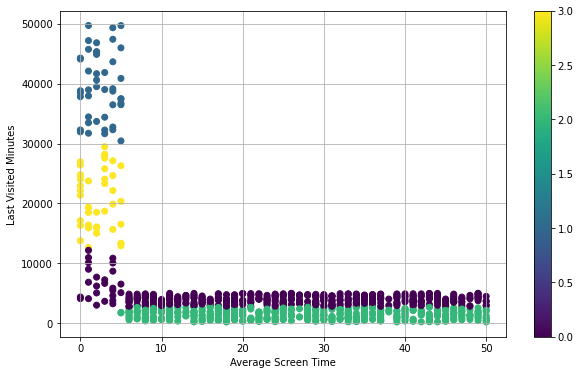

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x["Average Screen Time"],x["Last Visited Minutes"],c=tahmin) # c renk için c nin farklı olması gerek
# başlıkların için nokta boşluk olduğu için ayrı ayrı parantezle x i yazdık
plt.xlabel("Average Screen Time") # x sutununa isim verdik
plt.ylabel("Last Visited Minutes") # y sutununa isim verdik
plt.colorbar()
# plt.legend()
plt.grid()

In [16]:
allscore=[]
allclusters=[]
uzaklıklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklık=model.inertia_
        print(" Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzaklıklar.append(uzaklık)
clust(10)

 Cluster  2  score  0.9006579314865902
 Cluster  3  score  0.8664499519273
 Cluster  4  score  0.5802486109061301
 Cluster  5  score  0.5864849580744559
 Cluster  6  score  0.5860610701960908
 Cluster  7  score  0.5889315837457023
 Cluster  8  score  0.5053651490708727
 Cluster  9  score  0.5152780517974804
 Cluster  10  score  0.4538163757460619
 Cluster  11  score  0.46029110546346724


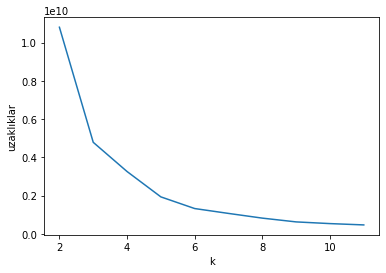

In [17]:
plt.xlabel("k")
plt.ylabel("uzaklıklar")
plt.plot(allclusters,uzaklıklar)